# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# from open weather documentation: api.openweathermap.org/data/2.5/find?q=London&units=imperial

url = 'http://api.openweathermap.org/data/2.5/weather?'
api_key = weather_api_key
units = 'imperial'
query = f'{url}&appid={api_key}&units={units}&q='

# response = requests.get(query).json()
# response['name']

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

print(f'Beginning Data Retrieval')
print(f'-----------------------------------')
idx_counter = 0
counter = 1

for idx,city in enumerate(cities, start=1):
    
    try:
    
#         total = len(cities)
        response = requests.get(query + city).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
        if idx_counter > 49:
            idx_counter = 0
            counter = counter + 1
        else:
            idx_counter = idx_counter + 1

#         print(f'Processing record {counter} of {total}|' + response['name'])
        print(f'Processing record {idx_counter} of set {counter} |{city}')
       
    except KeyError:
        print(f'City not found. Skipping...')        
    pass



print(f'------------------------------------')          
print(f'Data Retrieval Complete')  
print(f'------------------------------------')   

Beginning Data Retrieval
-----------------------------------
City not found. Skipping...
Processing record 1 of set 1 |mataura
Processing record 2 of set 1 |devils lake
Processing record 3 of set 1 |punta arenas
Processing record 4 of set 1 |bethel
Processing record 5 of set 1 |borovsk
Processing record 6 of set 1 |itupiranga
City not found. Skipping...
Processing record 7 of set 1 |tiksi
Processing record 8 of set 1 |busselton
Processing record 9 of set 1 |bredasdorp
Processing record 10 of set 1 |abonnema
Processing record 11 of set 1 |qaanaaq
Processing record 12 of set 1 |saskylakh
Processing record 13 of set 1 |khatanga
Processing record 14 of set 1 |jamestown
Processing record 15 of set 1 |hobart
Processing record 16 of set 1 |kathu
Processing record 17 of set 1 |jacareacanga
Processing record 18 of set 1 |rikitea
Processing record 19 of set 1 |uyemskiy
Processing record 20 of set 1 |newry
Processing record 21 of set 1 |lazaro cardenas
Processing record 22 of set 1 |calvillo
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp":Max_Temp,
    "Humidity": Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date}
weather_data = pd.DataFrame(data)
weather_data.head()
weather_data.to_csv('weather_data.csv')
weather_data.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,46.00,88,4,5.01,NZ,1604162071
1,Devils Lake,48.11,-98.87,39.20,55,75,36.91,US,1604162071
2,Punta Arenas,-53.15,-70.92,53.60,66,0,3.36,CL,1604162071
3,Bethel,41.37,-73.41,42.01,55,1,6.93,US,1604162071
4,Borovsk,55.21,36.49,46.00,71,5,11.01,RU,1604162071


In [6]:
# city_data = weather_data[weather_data["City"] == 'San Francisco']
# city_data

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.605633,13.755811,58.169287,71.228164,49.568627,8.119073,1.604162e+09
std,33.193205,90.942301,24.092520,20.341232,39.432211,5.627263,6.934959e+01
min,-54.800000,-175.200000,-14.370000,11.000000,0.000000,0.270000,1.604162e+09
25%,-5.560000,-68.300000,42.280000,60.000000,3.000000,4.000000,1.604162e+09
50%,26.570000,17.430000,64.990000,75.000000,44.000000,6.760000,1.604162e+09
75%,50.720000,84.600000,77.000000,87.000000,90.000000,10.760000,1.604162e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.030000,1.604162e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity = weather_data[weather_data['Humidity']>100].index
humidity

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,46.00,88,4,5.01,NZ,1604162071
1,Devils Lake,48.11,-98.87,39.20,55,75,36.91,US,1604162071
2,Punta Arenas,-53.15,-70.92,53.60,66,0,3.36,CL,1604162071
3,Bethel,41.37,-73.41,42.01,55,1,6.93,US,1604162071
4,Borovsk,55.21,36.49,46.00,71,5,11.01,RU,1604162071
...,...,...,...,...,...,...,...,...,...
556,Ventspils,57.39,21.56,46.40,100,90,4.70,LV,1604162144
557,Yenagoa,4.92,6.26,79.41,86,82,4.83,NG,1604162144
558,Manta,-0.95,-80.73,77.00,73,75,8.05,EC,1604161984
559,Pesqueira,-8.36,-36.70,85.71,42,95,9.91,BR,1604162145


In [10]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv('clean_city_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

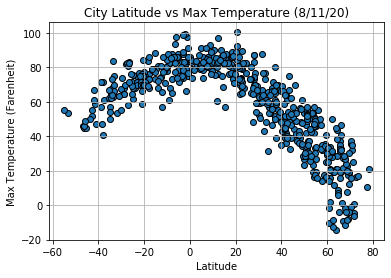

In [11]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", edgecolors='black')

plt.title("City Latitude vs Max Temperature (8/11/20)")
plt.ylabel("Max Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../saved_figures/lat_vs_maxtemp.png")

## Latitude vs. Humidity Plot

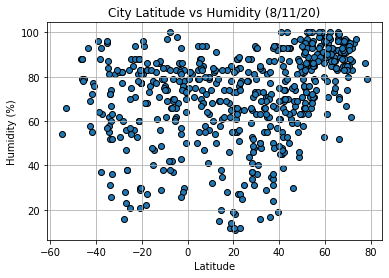

In [12]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", edgecolors='black')

plt.title("City Latitude vs Humidity (8/11/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../saved_figures/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

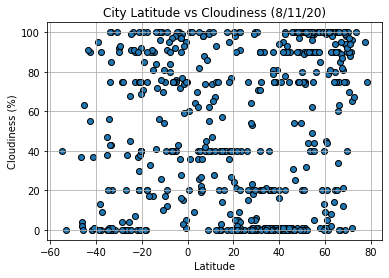

In [13]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", edgecolors='black')

plt.title("City Latitude vs Cloudiness (8/11/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../saved_figures/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

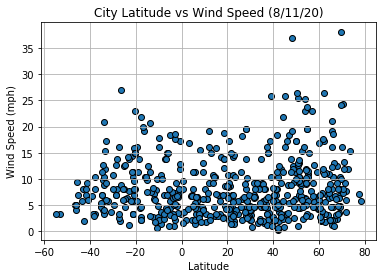

In [14]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", edgecolors='black')

plt.title("City Latitude vs Wind Speed (8/11/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../saved_figures/lat_vs_windspeed.png")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_reg(x_values,y_values, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
    print(f"The r-squared is: {r_value**2}")
    plt.scatter(x_values,y_values, label="fitted line")
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return line_eq
 
def annotate(line_eq, a,b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")   
  

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north = clean_city_data.loc[weather_data['Lat'] >= 0]
south = clean_city_data.loc[weather_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7823221244617228


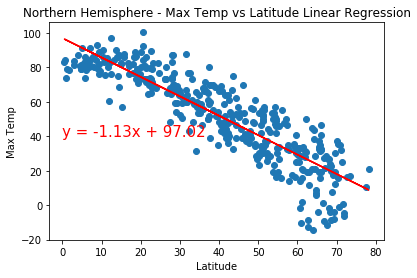

In [17]:
north_scatter = line_reg(north['Lat'], north['Max Temp'],'Northern Hemisphere - Max Temp vs Latitude Linear Regression','Latitude', 'Max Temp')
annotate(north_scatter,0,40)
plt.savefig("../saved_figures/northernhem_maxtemp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5687798671527027


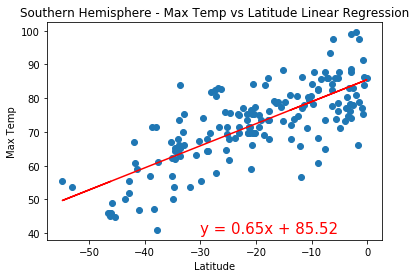

In [18]:
south_scatter = line_reg(south['Lat'], south['Max Temp'],'Southern Hemisphere - Max Temp vs Latitude Linear Regression','Latitude', 'Max Temp')
annotate(south_scatter,-30,40)
plt.savefig("../saved_figures/southern_hem_maxtemp_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17462162867390701


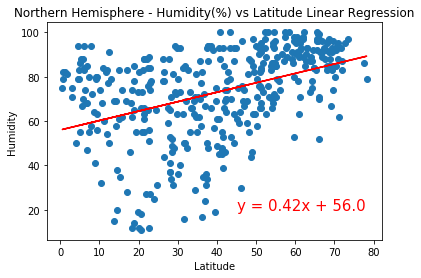

In [19]:
n_humidity = line_reg(north['Lat'], north['Humidity'],'Northern Hemisphere - Humidity(%) vs Latitude Linear Regression','Latitude', 'Humidity')
annotate(n_humidity,45,20)
plt.savefig("../saved_figures/northern_hem_humidity_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007116289237193665


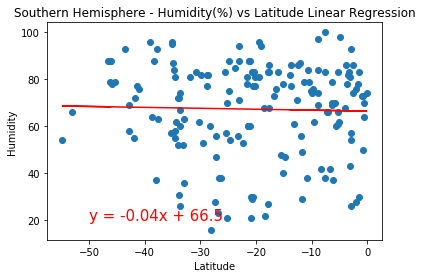

In [20]:
s_humidity = line_reg(south['Lat'], south['Humidity'],'Southern Hemisphere - Humidity(%) vs Latitude Linear Regression','Latitude', 'Humidity')
annotate(s_humidity, -50,20)
plt.savefig("../saved_figures/southern_hem_humidity_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08846213851195531


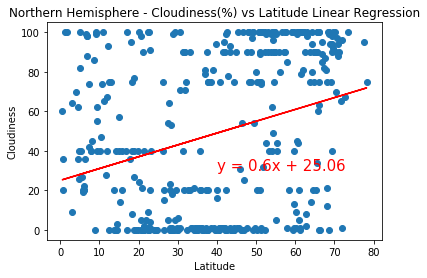

In [21]:
n_cloudiness = line_reg(north['Lat'], north['Cloudiness'],'Northern Hemisphere - Cloudiness(%) vs Latitude Linear Regression','Latitude', 'Cloudiness')
annotate(n_cloudiness, 40,30)
plt.savefig("../saved_figures/northern_hem_cloudiness_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13871652709696913


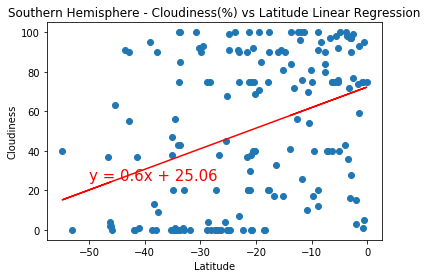

In [22]:
s_cloudiness = line_reg(south['Lat'], south['Cloudiness'],'Southern Hemisphere - Cloudiness(%) vs Latitude Linear Regression','Latitude', 'Cloudiness')
annotate(n_cloudiness, -50,25)
plt.savefig("../saved_figures/southern_hem_cloudiness_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028374632383714307


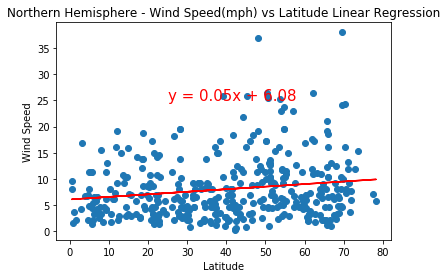

In [23]:
n_windspeed = line_reg(north['Lat'], north['Wind Speed'],'Northern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression','Latitude', 'Wind Speed')
annotate(n_windspeed, 25,25)
plt.savefig("../saved_figures/northern_hem_windspeed_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002420217770829367


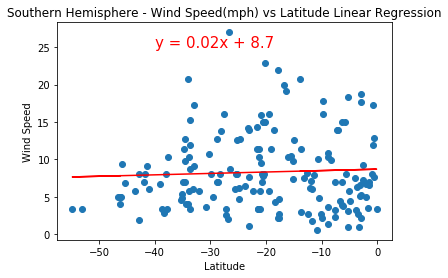

In [24]:
s_windspeed = line_reg(south['Lat'], south['Wind Speed'],'Southern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression','Latitude', 'Wind Speed')
annotate(s_windspeed, -40,25)
plt.savefig("../saved_figures/southern_hem_windspeed_vs_lat.png")